In [1]:
import pandas as pd
import numpy as np
import calendar

In [2]:
# Ahora leo las tablas creadas por las transformaciones anteriores
TablaCompleta = pd.read_csv(r'../Tablas_creadas/TablaCompleta.csv')
Reportes = pd.read_csv(r'../Tablas_creadas/Reportes.csv')
Estaciones = pd.read_csv(r'../Tablas_creadas/Estaciones.csv')
Temp_humedad = pd.read_csv(r'../Tablas_creadas/Temp_humedad.csv')

In [5]:
#Junto la temperatura y humedad con las provincias y departamentos correspondientes
T_prov = pd.merge(Temp_humedad, Estaciones, on='Estacion', how='right')


In [31]:
T_prov

,Estacion,T Media,H Media (%),año,mes,dia,index,depto,prov,prov_id
0,87641,23.56,58.91,2018,January,1.0,0,Azul,Buenos Aires,6
1,87641,23.56,58.91,2018,January,2.0,0,Azul,Buenos Aires,6
2,87641,23.56,58.91,2018,January,3.0,0,Azul,Buenos Aires,6
3,87641,23.56,58.91,2018,January,4.0,0,Azul,Buenos Aires,6
4,87641,23.56,58.91,2018,January,5.0,0,Azul,Buenos Aires,6
...,...,...,...,...,...,...,...,...,...,...
254993,87121,12.67,74.07,2024,June,16.0,117,Tucuman,Tucumán,90
254994,87121,12.67,74.07,2024,June,17.0,117,Tucuman,Tucumán,90
254995,87121,12.67,74.07,2024,June,18.0,117,Tucuman,Tucumán,90
254996,87121,12.67,74.07,2024,June,19.0,117,Tucuman,Tucumán,90


In [6]:
TablaCompleta.head()

,id_depto,depto,prov_id,prov,año,evento,edad_id,edad_desc,cantidad,mes
0,6000,*Sin Dato*,6,Buenos Aires,2018,Dengue,9,De 45 A 64 Años,1.0,March
1,6035,Avellaneda,6,Buenos Aires,2018,Dengue,6,De 15 a 24 años,1.0,February
2,6035,Avellaneda,6,Buenos Aires,2018,Dengue,9,De 45 A 64 Años,1.0,February
3,6035,Avellaneda,6,Buenos Aires,2018,Dengue,5,De 10 A 14 Años,1.0,March
4,6035,Avellaneda,6,Buenos Aires,2018,Dengue,6,De 15 a 24 años,1.0,March


In [8]:
#Lidiando con los valores NaN e inf para poder pasar los años de float a int
T_prov['año'] = T_prov['año'].replace([np.inf, -np.inf], np.nan)
T_prov['año'] = T_prov['año'].fillna(0)
T_prov['año'] = T_prov['año'].astype(int)
T_prov

,Estacion,T Media,H Media (%),año,mes,dia,index,depto,prov,prov_id
0,87641,21.8,39.0,2018,January,1.0,0,Azul,Buenos Aires,6
1,87641,21.8,41.0,2018,January,2.0,0,Azul,Buenos Aires,6
2,87641,22.2,40.0,2018,January,3.0,0,Azul,Buenos Aires,6
3,87641,26.2,40.0,2018,January,4.0,0,Azul,Buenos Aires,6
4,87641,18.9,73.0,2018,January,5.0,0,Azul,Buenos Aires,6
...,...,...,...,...,...,...,...,...,...,...
254993,87121,15.7,66.0,2024,June,16.0,117,Tucuman,Tucumán,90
254994,87121,13.4,77.0,2024,June,17.0,117,Tucuman,Tucumán,90
254995,87121,14.5,82.0,2024,June,18.0,117,Tucuman,Tucumán,90
254996,87121,16.0,84.0,2024,June,19.0,117,Tucuman,Tucumán,90


In [9]:
#saco el promedio de temperatura por mes
promedio_mes = T_prov.groupby([
    'mes', 'año'
])['T Media'].transform('mean')

promedio_mes

0         23.564242
1         23.564242
2         23.564242
3         23.564242
4         23.564242
            ...    
254993    12.670483
254994    12.670483
254995    12.670483
254996    12.670483
254997    12.670483
Name: T Media, Length: 254998, dtype: float64

In [10]:
#saco el promedio de humedad por mes
promedioH_mes = T_prov.groupby([
    'mes', 'año'
])['H Media (%)'].transform('mean')

promedioH_mes

0         58.912844
1         58.912844
2         58.912844
3         58.912844
4         58.912844
            ...    
254993    74.071014
254994    74.071014
254995    74.071014
254996    74.071014
254997    74.071014
Name: H Media (%), Length: 254998, dtype: float64

In [11]:
#reemplazo la temperatura y humedad diaria por el promedio mensual de cada provincia
T_prov['T Media'] = promedio_mes.round(2)
T_prov['H Media (%)'] = promedioH_mes.round(2)
T_prov.sample(8)


,Estacion,T Media,H Media (%),año,mes,dia,index,depto,prov,prov_id
67032,87155,17.92,72.71,2021,April,30.0,33,Resistencia,Chaco,22
120060,87043,21.53,67.00,2024,March,6.0,59,Jujuy U N,Jujuy,38
236654,87480,20.33,57.79,2021,November,12.0,109,Rosario,Santa Fe,82
46129,87596,15.77,67.86,2022,April,30.0,21,Punta Indio B.A.,Buenos Aires,6
84775,87534,23.24,60.08,2018,February,23.0,42,Laboulaye,Córdoba,14
208960,87448,21.86,50.96,2022,November,6.0,97,Villa Reynolds,San Luis,74
22325,87548,20.33,57.79,2021,November,8.0,10,Junin,Buenos Aires,6
37701,87643,10.65,62.02,2018,August,30.0,18,Olavarria,Buenos Aires,6


In [93]:
#selecciono las columnas que me interesan para hacer un merge con la TablaCompleta
TH_completa = T_prov[['prov_id', 'prov', 'año', 'mes', 'T Media', 'H Media (%)']]
TH_completa

,prov_id,prov,año,mes,T Media,H Media (%)
0,6,Buenos Aires,2018,January,23.56,58.91
1,6,Buenos Aires,2018,January,23.56,58.91
2,6,Buenos Aires,2018,January,23.56,58.91
3,6,Buenos Aires,2018,January,23.56,58.91
4,6,Buenos Aires,2018,January,23.56,58.91
...,...,...,...,...,...,...
254993,90,Tucumán,2024,June,12.67,74.07
254994,90,Tucumán,2024,June,12.67,74.07
254995,90,Tucumán,2024,June,12.67,74.07
254996,90,Tucumán,2024,June,12.67,74.07


In [40]:
#elimino los valores duplicados que corresponden a los departamentos específicos de cada provincia
TH_completa = TH_completa.drop_duplicates(subset=['prov', 'prov_id', 'mes', 'año'])
TH_completa

,prov_id,prov,año,mes,T Media,H Media (%)
0,6,Buenos Aires,2018,January,23.56,58.91
31,6,Buenos Aires,2018,February,23.24,60.08
59,6,Buenos Aires,2018,March,19.89,59.95
90,6,Buenos Aires,2018,April,18.62,71.15
120,6,Buenos Aires,2018,May,13.59,77.19
...,...,...,...,...,...,...
254857,90,Tucumán,2024,February,24.01,64.81
254886,90,Tucumán,2024,March,21.53,67.00
254917,90,Tucumán,2024,April,16.47,72.62
254947,90,Tucumán,2024,May,9.72,74.95


In [13]:
#Creamos una tabla con las columnas que voy a usar para agregar la temperatura mensual
df_completa = TablaCompleta[[column for column in TablaCompleta.columns if column in ['prov_id', 'prov', 'año', 'mes', 'cantidad']]]

#Ordenamos las columnas de la tabla
df_completa = df_completa[['prov_id', 'prov', 'año', 'mes', 'cantidad']]
df_completa

,prov_id,prov,año,mes,cantidad
0,6,Buenos Aires,2018,March,1.0
1,6,Buenos Aires,2018,February,1.0
2,6,Buenos Aires,2018,February,1.0
3,6,Buenos Aires,2018,March,1.0
4,6,Buenos Aires,2018,March,1.0
...,...,...,...,...,...
44827,34,Formosa,2024,March,1.0
44828,22,Chaco,2024,January,1.0
44829,22,Chaco,2024,May,1.0
44830,22,Chaco,2024,March,1.0


In [41]:
#Hacemos el merge en las columnas que coinciden
df_combinado = pd.merge(TH_completa, df_completa, on=['prov', 'prov_id', 'mes', 'año'], how='left')
df_combinado

,prov_id,prov,año,mes,T Media,H Media (%),cantidad
0,6,Buenos Aires,2018,January,23.56,58.91,1.0
1,6,Buenos Aires,2018,February,23.24,60.08,1.0
2,6,Buenos Aires,2018,February,23.24,60.08,1.0
3,6,Buenos Aires,2018,February,23.24,60.08,1.0
4,6,Buenos Aires,2018,February,23.24,60.08,1.0
...,...,...,...,...,...,...,...
41897,90,Tucumán,2024,May,9.72,74.95,13.0
41898,90,Tucumán,2024,May,9.72,74.95,9.0
41899,90,Tucumán,2024,May,9.72,74.95,1.0
41900,90,Tucumán,2024,May,9.72,74.95,1.0


In [42]:
#verificamos que la cantidad de casos no se haya visto alterada
df_combinado['cantidad'].sum()

452376.0

In [43]:
#elimino los valroes NaN de la columna cantidad
df_combinado = df_combinado.dropna(subset=['cantidad'])
df_combinado

,prov_id,prov,año,mes,T Media,H Media (%),cantidad
0,6,Buenos Aires,2018,January,23.56,58.91,1.0
1,6,Buenos Aires,2018,February,23.24,60.08,1.0
2,6,Buenos Aires,2018,February,23.24,60.08,1.0
3,6,Buenos Aires,2018,February,23.24,60.08,1.0
4,6,Buenos Aires,2018,February,23.24,60.08,1.0
...,...,...,...,...,...,...,...
41896,90,Tucumán,2024,May,9.72,74.95,24.0
41897,90,Tucumán,2024,May,9.72,74.95,13.0
41898,90,Tucumán,2024,May,9.72,74.95,9.0
41899,90,Tucumán,2024,May,9.72,74.95,1.0


In [44]:
#paso los datos de la columna cantidad de float a int
df_combinado['cantidad'] = df_combinado['cantidad'].astype(int)
df_combinado

/var/folders/46/9s45wmy9699b24x4g7424hym0000gn/T/ipykernel_4812/1123077227.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combinado['cantidad'] = df_combinado['cantidad'].astype(int)


,prov_id,prov,año,mes,T Media,H Media (%),cantidad
0,6,Buenos Aires,2018,January,23.56,58.91,1
1,6,Buenos Aires,2018,February,23.24,60.08,1
2,6,Buenos Aires,2018,February,23.24,60.08,1
3,6,Buenos Aires,2018,February,23.24,60.08,1
4,6,Buenos Aires,2018,February,23.24,60.08,1
...,...,...,...,...,...,...,...
41896,90,Tucumán,2024,May,9.72,74.95,24
41897,90,Tucumán,2024,May,9.72,74.95,13
41898,90,Tucumán,2024,May,9.72,74.95,9
41899,90,Tucumán,2024,May,9.72,74.95,1


In [85]:
df_combinado['cantidad'].sum()

452376

In [94]:
df_combinado['año'].unique()

array([2018, 2019, 2020, 2021, 2022, 2023, 2024])

In [95]:
df_combinado['mes'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'October',
       'November', 'July', 'August', 'September', 'December'],
      dtype=object)

In [96]:
df_combinado['prov'].unique()

array(['Buenos Aires', 'Catamarca', 'Chaco', 'Chubut', 'Córdoba',
       'Corrientes', 'Formosa', 'Jujuy', 'La Pampa', 'La Rioja',
       'Mendoza', 'Misiones', 'Neuquén', 'Río Negro', 'Salta', 'San Juan',
       'San Luis', 'Santa Cruz', 'Santa Fe', 'Santiago Del Estero',
       'Tierra Del Fuego', 'Tucumán'], dtype=object)

In [97]:
from itertools import product

In [109]:
temp = pd.DataFrame([*product(df_combinado['prov'].unique(), df_combinado['año'].unique(), df_combinado['mes'].unique(), [0])], columns=['prov', 'año', 'mes', 'cantidad']).merge(df_combinado, on=['prov', 'año', 'mes'], how='left')
temp

,prov,año,mes,cantidad_x,prov_id,T Media,H Media (%),cantidad_y
0,Buenos Aires,2018,January,0,6.0,23.56,58.91,1.0
1,Buenos Aires,2018,February,0,6.0,23.24,60.08,1.0
2,Buenos Aires,2018,February,0,6.0,23.24,60.08,1.0
3,Buenos Aires,2018,February,0,6.0,23.24,60.08,1.0
4,Buenos Aires,2018,February,0,6.0,23.24,60.08,1.0
...,...,...,...,...,...,...,...,...
42027,Tucumán,2024,November,0,NaN,NaN,NaN,NaN
42028,Tucumán,2024,July,0,NaN,NaN,NaN,NaN
42029,Tucumán,2024,August,0,NaN,NaN,NaN,NaN
42030,Tucumán,2024,September,0,NaN,NaN,NaN,NaN


In [110]:
temp['cantidad'] = temp['cantidad_x'] + temp['cantidad_y'].fillna(0)


In [ ]:
#filtro con varias condiciones y chequeo que lo siguiente está bien
temp[(temp['mes'] == 'April') & (temp['año'] == 2018) & (temp['prov'] == 'Buenos Aires')]['cantidad'].sum()

In [124]:
df_ml = temp.groupby([
    'prov', 'año', 'mes'
]).agg({
    'T Media': ['mean'],
    'H Media (%)': ['mean'],
    'cantidad': ['sum']
}).reset_index()
df_ml.column = [column[0] for column in df_ml.columns]
df_ml

/var/folders/46/9s45wmy9699b24x4g7424hym0000gn/T/ipykernel_4812/4220597491.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_ml.column = [column[0] for column in df_ml.columns]


,prov,año,mes,T Media,H Media (%),cantidad
,,,,mean,mean,sum
0,Buenos Aires,2018,April,18.62,71.15,139.0
1,Buenos Aires,2018,August,NaN,NaN,0.0
2,Buenos Aires,2018,December,NaN,NaN,0.0
3,Buenos Aires,2018,February,23.24,60.08,6.0
4,Buenos Aires,2018,January,23.56,58.91,1.0
...,...,...,...,...,...,...
1843,Tucumán,2024,March,21.53,67.00,15633.0
1844,Tucumán,2024,May,9.72,74.95,1291.0
1845,Tucumán,2024,November,NaN,NaN,0.0


In [126]:
train = df_ml[df_ml['año'] <= 2022][['T Media', 'H Media (%)', 'cantidad']]
test = df_ml[df_ml['año'] > 2022][['T Media', 'H Media (%)', 'cantidad']]


In [129]:
X_train = train[['T Media', 'H Media (%)']]
X_test = test[['T Media', 'H Media (%)']]
y_train = train['cantidad']
y_test = test['cantidad']

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

In [139]:
modelo = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler()),
    ('model', LinearRegression())
])

In [140]:
#entrenamos el modelo
modelo.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', MinMaxScaler()),
                ('model', LinearRegression())])

In [141]:
mean_squared_error(modelo.predict(X_train), y_train)

67481.75242520249

In [142]:
r2_score(modelo.predict(X_train), y_train)

-127.2905013239322

In [143]:
mean_squared_error(modelo.predict(X_test), y_test)

16317465.619168011

In [144]:
r2_score(modelo.predict(X_test), y_test)

-15897.145774526329

- la relación no es lineal
- la distribución entre train y test es muy distinta
- las dos variables no tienen suficiente información para predecir el target

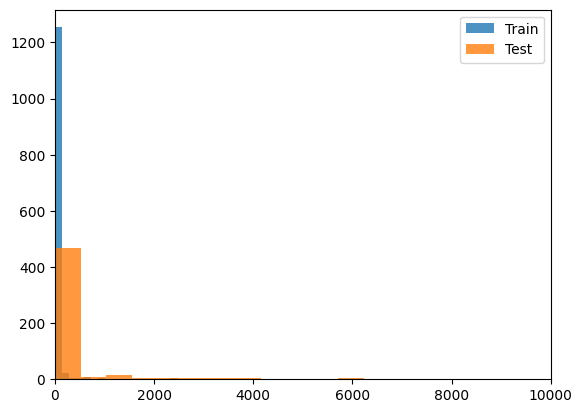

In [149]:
from matplotlib import pyplot as plt
plt.hist(y_train, bins=30, alpha=0.8, label='Train')
plt.hist(y_test, bins=100, alpha=0.8, label='Test')
plt.xlim(0,10000)
plt.legend()
plt.show()

In [151]:
print(
    f'{modelo[-1].coef_ = }',
    f'{modelo[-1].intercept_ = }',
    sep='\n'
)

modelo[-1].coef_ = array([[ 92.21932586, 247.63144937]])
modelo[-1].intercept_ = array([-154.74639328])


Al parecer, la humedad estaría teniendo más injerencia en la cantidad de casos de denge que la temperatura, teniendo en cuenta que Buenos Aires es de las más densamente poblada y la que suele tener altos porcentajes de humedad, esto estaría siendo algo a seguir indagando